In [148]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import copy as cp
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [149]:
df = pd.read_csv("Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [150]:
cont_cols = df.columns.difference(['Family','Genus', 'Species'])
cont_cols_df = df[cont_cols]

# label encoding categorical features (str-->float)
le = LabelEncoder()
le.fit(df["Family"])
cat_cols_arr = le.transform(df["Family"])
cat_cols_df = pd.DataFrame(cat_cols_arr, columns=["Family"])

# merge cont&cat dfs
df = pd.concat([cont_cols_df, cat_cols_df], axis=1)

In [151]:
X = df.loc[:, df.columns != 'Family']
y = df['Family']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
X_train.shape, X_test.shape

((5036, 23), (2159, 23))

In [154]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID,Family
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,1,3
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,1,3
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,1,3
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,1,3
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,1,3


In [155]:
def calculate_accuracy(clf, X, actual_classes):
    predicted_classes = clf.predict(X)
    accuracy = accuracy_score(actual_classes, predicted_classes)
    return accuracy * 100

--------------------

# a) Linear hard svm

In [156]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [157]:
print(f"accuracy on train: {calculate_accuracy(clf, X_train, y_train)} %")
print(f"accuracy on test: {calculate_accuracy(clf, X_test, y_test)} %")

accuracy on train: 97.1604447974583 %
accuracy on test: 95.87772116720704 %


In [158]:
print("number of support vectors:")
print(len(clf.support_vectors_))

number of support vectors:
597


--------------

# b) Linear soft svm

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [160]:
X_train.shape, X_test.shape, X_val.shape

((4029, 23), (1439, 23), (1727, 23))

In [161]:
result = []
C_s = list(np.logspace(-3, 2, 20))
for c in C_s:
    clf = svm.SVC(kernel="linear", C=c)
    clf.fit(X_train, y_train)   
    result.append(calculate_accuracy(clf, X_val, y_val))

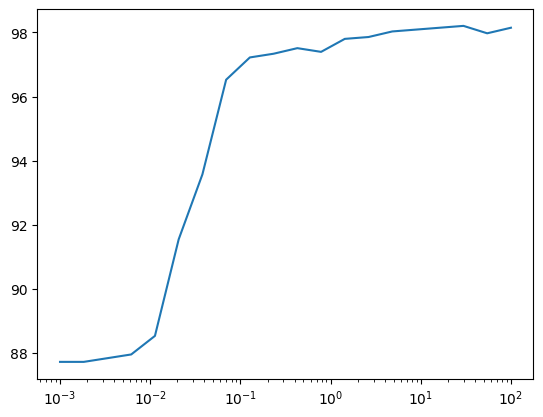

In [162]:
fig, ax0 = plt.subplots()
ax0.set_xscale('log')
ax0.plot(C_s, result)

In [163]:
C_best = C_s[np.argmax(result)]
print(f"best C = {C_best}")

best C = 29.763514416313193


In [164]:
clf = svm.SVC(kernel="linear", C=C_best)
clf.fit(X_train, y_train)

SVC(C=29.763514416313193, kernel='linear')

In [165]:
print(f"accuracy on train: {calculate_accuracy(clf, X_train, y_train)} %")
print(f"accuracy on test: {calculate_accuracy(clf, X_test, y_test)} %")

accuracy on train: 97.74137503102507 %
accuracy on test: 97.28978457261988 %


In [166]:
print("number of support vectors:")
print(len(clf.support_vectors_))

number of support vectors:
322


---------------------

# C) Hard svm with rbf kernel

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)
print(f"accuracy on train: {calculate_accuracy(clf, X_train, y_train)} %")
print(f"accuracy on test: {calculate_accuracy(clf, X_test, y_test)} %")
print("number of support vectors:")
print(len(clf.support_vectors_))

accuracy on train: 87.5297855440826 %
accuracy on test: 86.24363131079204 %
number of support vectors:
1395


In [169]:
clf = svm.SVC(kernel="poly")
clf.fit(X_train, y_train)
print(f"accuracy on train: {calculate_accuracy(clf, X_train, y_train)} %")
print(f"accuracy on test: {calculate_accuracy(clf, X_test, y_test)} %")
print("number of support vectors:")
print(len(clf.support_vectors_))

accuracy on train: 85.34551231135822 %
accuracy on test: 84.52987494210282 %
number of support vectors:
1815


----------------

# D) Soft svm with rbf kernel

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [171]:
X_train.shape, X_test.shape, X_val.shape

((4029, 23), (1439, 23), (1727, 23))

In [172]:
result = []
C_s = list(np.logspace(-3, 2, 20))
for c in C_s:
    clf = svm.SVC(kernel="rbf", C=c)
    clf.fit(X_train, y_train)   
    result.append(calculate_accuracy(clf, X_val, y_val))

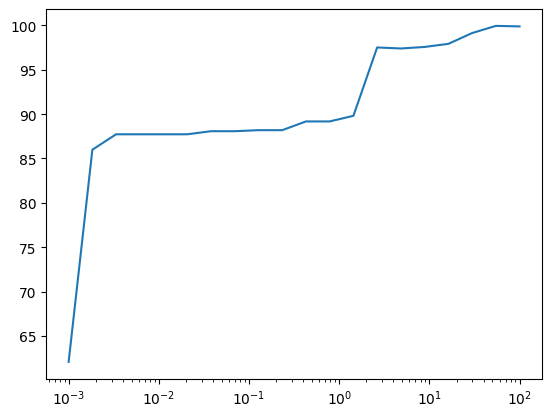

In [173]:
fig, ax0 = plt.subplots()
ax0.set_xscale('log')
ax0.plot(C_s, result)

In [174]:
C_best = C_s[np.argmax(result)]
print(f"best C = {C_best}")

best C = 54.555947811685144


In [175]:
clf = svm.SVC(kernel="rbf", C=C_best)
clf.fit(X_train, y_train)
print(f"accuracy on train: {calculate_accuracy(clf, X_train, y_train)} %")
print(f"accuracy on test: {calculate_accuracy(clf, X_test, y_test)} %")
print("number of support vectors:")
print(len(clf.support_vectors_))

accuracy on train: 99.82625961777116 %
accuracy on test: 99.79152189020152 %
number of support vectors:
341


--------------

In [176]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array):

    model_ = cp.deepcopy(model)
        
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    accuracy = np.empty([0], dtype=int)

    for train_ndx, test_ndx in kfold.split(X):
        # Extracts the rows from the data for the training and testing
        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        # Appends the actual target classifications to actual_classes
        actual_classes = np.append(actual_classes, test_y)
        # Fits the machine learning model using the training data extracted from the current fold
        model_.fit(train_X, train_y)
        # Uses the fitted model to predict the target classifications for the test data in the current fold
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))
        accuracy = np.append(accuracy, accuracy_score(actual_classes, predicted_classes))
        
    return actual_classes, predicted_classes, accuracy.mean(), model_

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [178]:
X_train.shape, X_test.shape, X_val.shape

((4029, 23), (1439, 23), (1727, 23))

In [179]:
result = []
C_s = list(np.logspace(-3, 2, 20))
for c in C_s:
    clf = svm.SVC(kernel="rbf", C=c)
    clf.fit(X_train, y_train)   
    result.append(calculate_accuracy(clf, X_val, y_val))

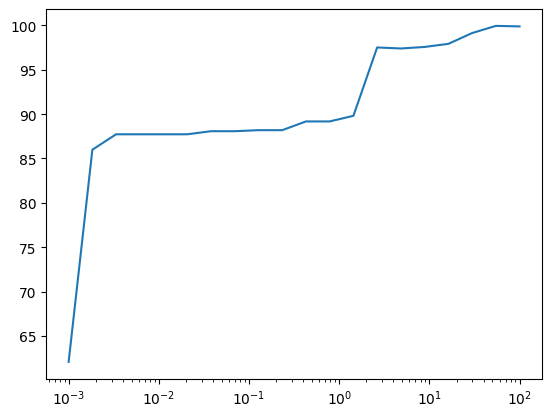

In [180]:
fig, ax0 = plt.subplots()
ax0.set_xscale('log')
ax0.plot(C_s, result)

In [181]:
C_best = C_s[np.argmax(result)]
print(f"best C = {C_best}")

best C = 54.555947811685144


In [ ]:
model = svm.SVC(kernel="rbf", C=C_best)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, accuracy, clf = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())

print(f"accuracy on train: {calculate_accuracy(clf, X_train, y_train)} %")
print(f"accuracy on test: {calculate_accuracy(clf, X_test, y_test)} %")
print("number of support vectors:")
print(len(clf.support_vectors_))

accuracy on train: 99.8758997269794 %
accuracy on test: 99.93050729673384 %
number of support vectors:
398


/home/hosna/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/hosna/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
